## Fraud Check data

## Importing Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier

## Importing dataset

In [83]:
fc=pd.read_csv("D:\\assignment\\Random Forest\\Fraud_check.csv")
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## introducing Taxable.Income<= 30000 : risky, Taxable.Income>= 30000: good

In [84]:
fc['Taxable.Income']=pd.cut(fc['Taxable.Income'],bins=[0,30000,90000],labels=['risky','good'])
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO


In [85]:
fc.shape

(600, 6)

In [86]:
fc.isnull().sum()

Undergrad           0
Marital.Status      0
Taxable.Income     75
City.Population     0
Work.Experience     0
Urban               0
dtype: int64

In [87]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    object  
 1   Marital.Status   600 non-null    object  
 2   Taxable.Income   525 non-null    category
 3   City.Population  600 non-null    int64   
 4   Work.Experience  600 non-null    int64   
 5   Urban            600 non-null    object  
dtypes: category(1), int64(2), object(3)
memory usage: 24.3+ KB


## encoding each column into numeric format by using label encoder

In [88]:
for column in fc.columns:
    le = LabelEncoder()
    fc[column] = le.fit_transform(fc[column])

In [89]:
fc.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,84,10,1
1,1,0,0,398,18,1
2,0,1,0,481,30,1
3,1,2,0,574,15,1
4,0,1,0,4,28,0


## Visualisation

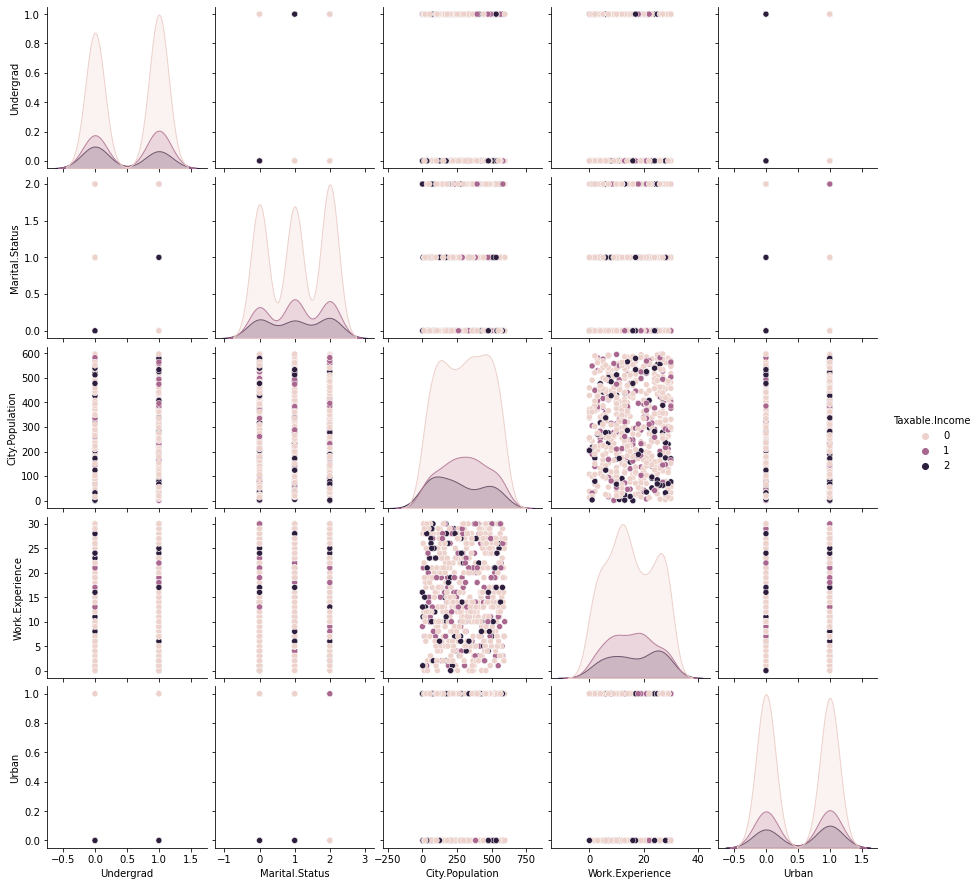

In [90]:
import seaborn as sns
sns.pairplot(data=fc,hue='Taxable.Income')

<AxesSubplot:>

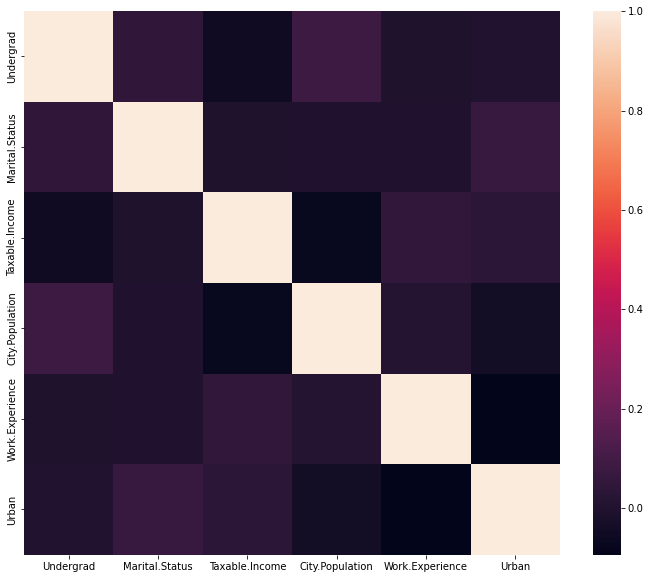

In [91]:
plt.figure(figsize=(12,10))
sns.heatmap(fc.corr())

## splitting the data set

In [92]:
x=fc.loc[:, ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']]
y=fc['Taxable.Income']

## Random forests classification

In [93]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [94]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=42, shuffle=True) #Bootstrap
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [95]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.5833333333333333


## splitting data set into training and testing

In [96]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42) 

## random forests regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=20,max_depth=3,random_state=42)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=20, random_state=42)

In [98]:
y_pred = rfr.predict(x_test)

In [99]:
y_pred

array([0.42968719, 0.46997789, 0.54825629, 0.41304722, 0.44527865,
       0.54252504, 0.42215451, 0.3447143 , 0.56497557, 0.38989081,
       0.36380995, 0.48046877, 0.47101149, 0.38340136, 0.4856203 ,
       0.39988123, 0.45502831, 0.35278731, 0.39748389, 0.37790587,
       0.50535413, 0.50535413, 0.42049633, 0.43280748, 0.35278731,
       0.36061055, 0.4048684 , 0.38462417, 0.51821139, 0.37155182,
       0.45181718, 0.43500937, 0.48669027, 0.38808877, 0.4343637 ,
       0.61894689, 0.38081722, 0.41474679, 0.45420826, 0.40359043,
       0.34064522, 0.6017638 , 0.43681648, 0.50535413, 0.54825629,
       0.45129855, 0.40610617, 0.43663652, 0.42703898, 0.47452786,
       0.52560596, 0.41135702, 0.49414295, 0.35955456, 0.37281674,
       0.83863918, 0.46663937, 0.49821939, 0.44336797, 0.39503809,
       0.37674269, 0.4856203 , 0.45076119, 0.42511201, 0.50544085,
       0.50013042, 0.57483874, 0.43622572, 0.43385675, 0.44491705,
       0.43385675, 0.4353214 , 0.43171808, 0.52803345, 0.50535

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6206985880432292
Mean Squared Error: 0.5267693118058459
Root Mean Squared Error: 0.7257887515013207


## Bagging

In [101]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 10, random_state = 0,shuffle=True)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator = cart, n_estimators = 20, random_state = 0)

In [102]:
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean())

0.6016666666666667


## AdaBoost Classification

In [103]:
kfold = KFold(n_splits = 10, random_state =42, shuffle = True)
model = AdaBoostClassifier(n_estimators = 10, random_state =42)


In [104]:
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.6683333333333333


## HistGradient Boosting Classification

In [105]:
from sklearn.ensemble import HistGradientBoostingClassifier


kfold = KFold(n_splits = 10, random_state = 42,shuffle=True)
cart = DecisionTreeClassifier()
model1 =HistGradientBoostingClassifier(random_state =42).fit(x,y)

results = cross_val_score(model1, x, y)
print(results.mean())

0.5683333333333334


## Random Forest Classification

### using KFold

In [112]:
kfold = KFold(n_splits = 10, random_state = 42, shuffle = True)
model = RandomForestClassifier(n_estimators = 1000, max_features = 5, criterion = 'gini')

In [113]:
results = cross_val_score(model, x, y, cv = kfold)
print(results.mean())

0.605


### importing muliple models

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

###  create the sub models

In [108]:

estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

###  create the ensemble model

In [109]:
ensemble = VotingClassifier(estimators)

In [110]:
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

C:\Users\rajpu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6683333333333333


In [111]:
estimators

[('logistic', LogisticRegression(max_iter=500)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]